In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import ticker
import pathlib

In [2]:
## Create plots directory, if missing
plot_directory = (str(pathlib.Path.home())
                  + '/classifier-studies/'
                  + 'plots/'
                  + 'exploratory_feature_analysis/'
)
pathlib.Path(plot_directory).mkdir(parents=True, exist_ok=True)

# Read training data from HDF5 file
Testing data is randomly sampled from training, no need to repeat the anaylisis with weaker statistics.

In [3]:
input_train = './data/trainData.h5'
df_train = pd.read_hdf(input_train, 'LHCb_Train')
df_train

,p_PT,p_PZ,DTF_FixJPsi_p_PT,DTF_FixJPsi_p_PZ,DTF_FixJPsiLambda_p_PT,DTF_FixJPsiLambda_p_PZ,pim_PT,pim_PZ,DTF_FixJPsi_pim_PT,DTF_FixJPsi_pim_PZ,...,L_VFASPF_CHI2_VDOF,Lb_VFASPF_CHI2_VDOF,L_BPVIPCHI2,Lb_BPVIPCHI2,L_BPVVDCHI2,Lb_BPVVDCHI2,DTF_FixJPsi_status,DTF_FixJPsiLambda_status,TYPE,DTF_FixJPsiLambda_Lb_M
0,1499.261230,64090.687500,1449.125122,71109.312500,1339.061157,67585.578125,142.576462,16002.674805,222.223770,15295.935547,...,12.397956,1.006837,3.118125,4.247471,8394.141602,839.898499,0.0,0.0,1,5649.782715
1,6531.696777,43770.664062,7950.545410,53713.472656,7250.666016,48946.476562,1098.382568,7154.821289,1173.632935,7339.285645,...,72.018669,4.932845,9.285525,0.700478,316576.343750,28.328979,0.0,0.0,1,5346.287598
2,1195.592285,25513.001953,2846.242432,45061.835938,2590.605225,40850.550781,600.855042,6536.190430,531.966919,6502.588379,...,58.929020,38.498478,109.721619,0.822907,48769.886719,969.064880,0.0,0.0,1,5625.960449
3,8357.870117,48524.460938,13019.551758,77204.125000,10886.081055,65169.863281,954.039429,8363.340820,1251.309082,8721.902344,...,4.634126,2.500692,5.822659,0.760508,2613.000244,11152.960938,0.0,0.0,1,5480.049316
4,931.300659,24994.496094,1355.522217,32809.832031,1152.498901,30213.080078,812.275085,7415.243652,194.003128,7669.465332,...,2.344827,9.562636,28.231209,3.574740,1273.676514,22431.037109,0.0,1.0,1,5446.454102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5472644,1010.154358,43585.253906,834.157104,36020.722656,2062.077637,90746.234375,163.722885,7249.501465,162.814896,7284.698730,...,0.402552,1.787724,4.766886,29.171247,26563.222656,132.886627,0.0,1.0,0,7601.270508
5472645,788.994019,30219.402344,846.339722,29809.490234,950.482178,33396.257812,68.395859,2443.232910,77.663048,2415.952637,...,0.909791,1.954522,5.995909,62.136440,911979.750000,480.069275,0.0,0.0,0,6392.341797
5472646,514.532471,18133.210938,437.694672,18358.109375,1374.070068,58323.972656,275.153046,14757.525391,354.424286,14406.655273,...,0.603335,1.080816,2.631017,39.063274,739.135437,63.726597,0.0,3.0,0,6506.649414
5472647,1777.671997,77276.789062,1338.395874,72462.937500,7582.245117,364143.500000,78.957039,14143.750000,308.220764,13831.672852,...,0.171859,0.390803,1.136327,167.958542,1609.802612,171.852966,0.0,1.0,0,10292.375000


In [4]:
df_signal = df_train[df_train['TYPE'] == 1]
df_bkg = df_train[df_train['TYPE'] == 0]

# Invariant mass distribution

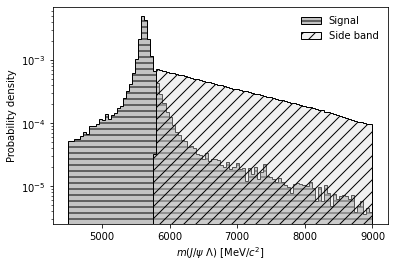

In [5]:
xrange=(4500,9000)
binning=100

plt.hist(df_signal['DTF_FixJPsiLambda_Lb_M'],
         bins=binning,
         range=xrange,
         label='Signal',
         density=True,
         histtype='stepfilled',
         edgecolor='black',
         color=mcolors.to_rgba('dimgrey', alpha=0.4),
         hatch='--'
)

plt.hist(df_bkg['DTF_FixJPsiLambda_Lb_M'],
         bins=binning,
         range=xrange,
         label='Side band',
         density=True,
         histtype='stepfilled',
         edgecolor='black',
         color=mcolors.to_rgba('gainsboro', alpha=0.4),
         hatch='//'
)
#plt.grid()
plt.xlabel("$m(J/\psi~\Lambda)$ [MeV/$c^2$]")
#plt.title("Training data $\Lambda_b$ invariant mass\n (DTF w/ $J/\psi$ & $\Lambda$ mass constraint)")
plt.legend(frameon=False)
plt.yscale('log')
plt.ylabel("Probability density")
plt.savefig(plot_directory + 'sig_bkg_distribution.pdf', bbox_inches='tight')
plt.show()

# Correlation matrices

In [6]:
features = [
    'p_PT',
    'p_PZ',
    'DTF_FixJPsi_p_PT',
    'DTF_FixJPsi_p_PZ',
    'DTF_FixJPsiLambda_p_PT',
    'DTF_FixJPsiLambda_p_PZ',
    'pim_PT',
    'pim_PZ',
    'DTF_FixJPsi_pim_PT',
    'DTF_FixJPsi_pim_PZ',
    'DTF_FixJPsiLambda_pim_PT',
    'DTF_FixJPsiLambda_pim_PZ',
    'Jpsi_PT',
    'Jpsi_PZ',
    'L_ENDVERTEX_X',
    'L_ENDVERTEX_Y',
    'L_ENDVERTEX_Z',
    'L_BPVDIRA',
    'Lb_BPVDIRA',
    'L_VFASPF_CHI2_VDOF',
    'Lb_VFASPF_CHI2_VDOF',
    'L_BPVIPCHI2',
    'Lb_BPVIPCHI2',
    'L_BPVVDCHI2',
    'Lb_BPVVDCHI2',
    'DTF_FixJPsi_status',
    'DTF_FixJPsiLambda_status'
]

In [7]:
feature_labels = {
    'p_PT': '$p_T(p)$',
    'DTF_FixJPsi_p_PT': '$p_T^{DTF}(p)$',
    'DTF_FixJPsiLambda_p_PT': '$p_T^{DTF}(p)$ ($\Lambda$ m.c.)',
    'p_PZ': '$p_z(p)$',
    'DTF_FixJPsi_p_PZ': '$p_z^{DTF}(p)$',
    'DTF_FixJPsiLambda_p_PZ': '$p_z^{DTF}(p)$ ($\Lambda$ m.c.)',
    'pim_PT': '$p_T(\pi)$',
    'DTF_FixJPsi_pim_PT': '$p_T^{DTF}(\pi)$',
    'DTF_FixJPsiLambda_pim_PT': '$p_T^{DTF}(\pi)$ ($\Lambda$ m.c.)',
    'pim_PZ': '$p_z(\pi)$',
    'DTF_FixJPsi_pim_PZ': '$p_z^{DTF}(\pi)$',
    'DTF_FixJPsiLambda_pim_PZ': '$p_Z^{DTF}(\pi)$ ($\Lambda$ m.c.)',
    'Jpsi_PT': '$p_T(J/\psi)$',
    'Jpsi_PZ': '$p_z(J/\psi)$',
    'L_ENDVERTEX_X': '$x_{vtx}^\Lambda$',
    'L_ENDVERTEX_Y': '$y_{vtx}^\Lambda$',
    'L_ENDVERTEX_Z': '$z_{vtx}^\Lambda$',
    'L_BPVDIRA': '$\Lambda$ DIRA',
    'Lb_BPVDIRA': '$\Lambda_b$ DIRA',
    'L_VFASPF_CHI2_VDOF': '$\chi^2_{vtx}(\Lambda)$',
    'Lb_VFASPF_CHI2_VDOF': '$\chi^2_{vtx}(\Lambda_b)$',
    'L_BPVIPCHI2': '$\Lambda$ IPCHI2',
    'Lb_BPVIPCHI2': '$\Lambda_b$ IPCHI2',
    'L_BPVVDCHI2': '$\Lambda$ VDCHI2',
    'Lb_BPVVDCHI2': '$\Lambda_b$ VDCHI2',
    'DTF_FixJPsi_status': 'DTF convergence ($J/\psi$ m.c.)',
    'DTF_FixJPsiLambda_status': 'DTF convergence ($J/\psi~\Lambda$ m.c.)'
}

## Signal events

In [8]:
MC_covDF = df_signal[features].corr()

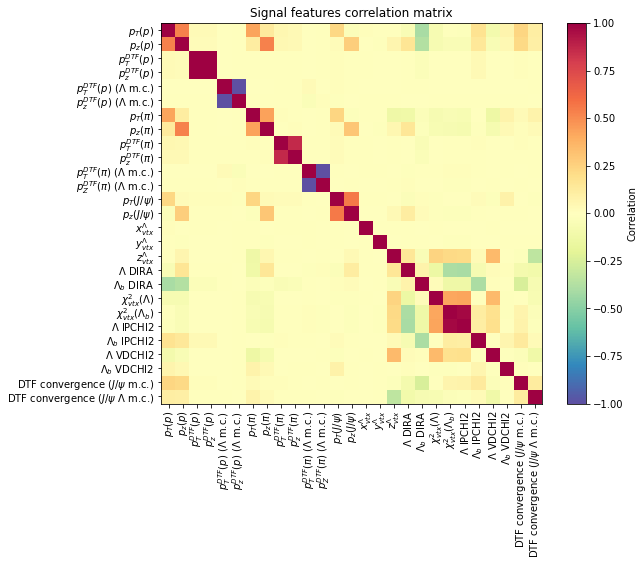

In [9]:
plt.figure(figsize=(9,7))
plt.matshow(MC_covDF, cmap='Spectral_r',fignum=0) ## Fignum=0 plots on current figure (matshow creates a new one by default)
plt.clim(-1,1)
plt.colorbar(label='Correlation')
plt.title("Signal features correlation matrix")
ax = plt.gca() 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.xaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.set_xticklabels([feature_labels[feature] for feature in features], rotation='vertical')
ax.set_yticklabels([feature_labels[feature] for feature in features])
plt.show()

Very high correlation between `Lb_VFASPF_CHI2_VDOF` and `L_BPVIPCHI2`. Significant correlation between daughter particles VF momenta, both between $p_T$ and $p_z$ (reasonable) and amongst themselves (expected for a pure signal sample).

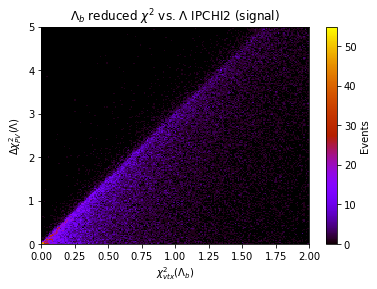

In [10]:
plt.hist2d(df_train.loc[df_train['TYPE'] == 1, 'Lb_VFASPF_CHI2_VDOF'],
           df_train.loc[df_train['TYPE'] == 1, 'L_BPVIPCHI2'],
           bins=200, cmap='gnuplot', range=[[0,2],[0,5]])
plt.title("$\Lambda_b$ reduced $\chi^2$ vs. $\Lambda$ IPCHI2 (signal)")
plt.xlabel("$\chi^2_{vtx}(\Lambda_b)$")
plt.ylabel("$\Delta\chi^2_{PV} (\Lambda)$")
plt.colorbar(label='Events')
plt.show()

Results on DTF variables are not as realiable because there are no cuts applied, therefore some outrageously bad values can (and do) screw with the correlation algorithm. For instance:

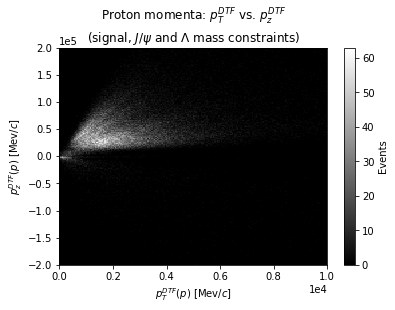

In [11]:
plt.hist2d(df_signal['DTF_FixJPsiLambda_p_PT'], df_signal['DTF_FixJPsiLambda_p_PZ'],
           bins=200, cmap='gray', range=[[0,1e4],[-2e5,2e5]])
plt.title("Proton momenta: $p_T^{DTF}$ vs. $p_z^{DTF}$\n(signal, $J/\psi$ and $\Lambda$ mass constraints)")
plt.xlabel("$p_T^{DTF}(p)$ [Mev/$c$]")
plt.ylabel("$p_z^{DTF}(p)$ [Mev/$c$]")
plt.colorbar(label='Events')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

Events are obviously correlated, but the algorithm is tricked by the small number of events in the lower region and thinks there is a heavy anti-correlation.

## Background events

In [12]:
SB_covDF = df_bkg[features].corr()

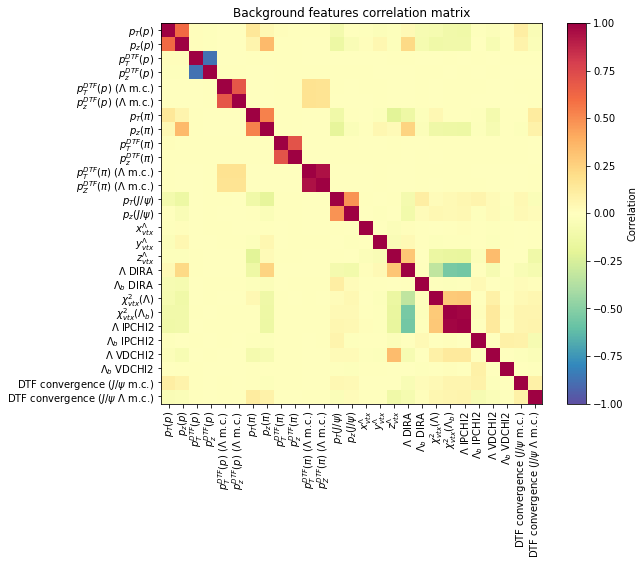

In [13]:
plt.figure(figsize=(9,7))
plt.matshow(SB_covDF, cmap='Spectral_r',fignum=0) ## Fignum=0 plots on current figure (matshow creates a new one by default)
plt.clim(-1,1)
plt.colorbar(label='Correlation')
plt.title("Background features correlation matrix")
ax = plt.gca() 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.xaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.set_xticklabels([feature_labels[feature] for feature in features], rotation='vertical')
ax.set_yticklabels([feature_labels[feature] for feature in features])
plt.show()

Generally less correlation between variables, in particular VF transverse/longitudinal momenta of the same particles. Slight anti-correlation between $\Lambda_b$ $\chi^2$ and $\Lambda$ pointing angle.

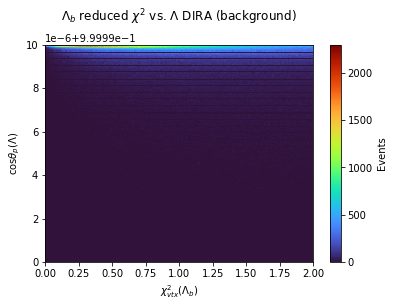

In [14]:
plt.hist2d(df_bkg['Lb_VFASPF_CHI2_VDOF'], df_bkg['L_BPVDIRA'],
           bins=200, cmap='turbo', range=[[0,2],[0.99999,1]])
plt.title("$\Lambda_b$ reduced $\chi^2$ vs. $\Lambda$ DIRA (background)\n")
plt.xlabel("$\chi^2_{vtx}(\Lambda_b)$")
plt.ylabel(r"$\cos\theta_p (\Lambda)$")
plt.colorbar(label='Events')
plt.show()